In [1]:
from scipy.io import wavfile
from scipy import signal
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
import numpy as np


samplerate, data = wavfile.read('inputaudio.wav')
# samplerate 是取樣率
# data 是音訊

In [2]:
duration = len(data)/samplerate
# 利用資料的長度除以取樣率會是整個音訊的長度，單位 秒。
time = np.arange(0,duration,1/samplerate)
# 用 np 建立個 0 ~ duration 時間的資料，資料之間的間隔為 1/samplerate

print(samplerate)

16000


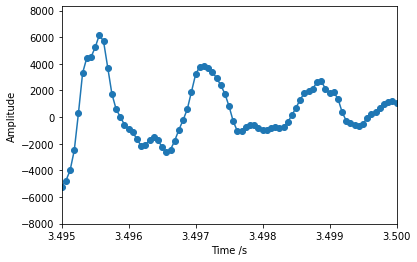

In [14]:
plt.figure() # pyplot
plt.plot(time, data,marker='o') # 開畫
plt.xlabel("Time /s")
plt.ylabel("Amplitude")

plt.xlim(3.495,3.5)
# 限制 x 軸的顯示範圍

plt.show()

# STFT

(201,)
(280,)


C:\Users\USER\AppData\Local\Temp/ipykernel_9812/1666566858.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=20, shading='flat')


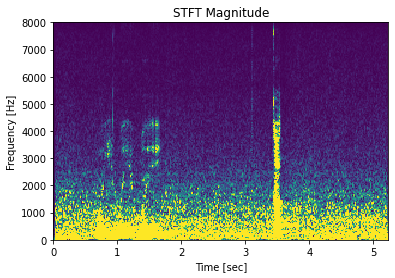

In [71]:
f, t, Zxx = signal.stft(data, samplerate, nperseg=400, noverlap=100)
# 進行 stft 轉換， nperseg 是音窗的長度，noverlap 是音窗之間重疊的長度，單位"應該"是資料量。
# 這邊是重疊 1/2，

print(f.shape)
print(t.shape)

plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=20, shading='flat')
# 劃出圖片，其中 vmin 和 vmax 就是資料的上限和下限，如果超過的話整片黃的或藍的，像下面一樣
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
# plt.xlim(0,1) # 限制x軸輸出範圍。
# plt.ylim(3000,4000) # 限制y軸輸出範圍。
plt.show()

# FFT
記得要加 abs 否則會因為虛數而輸出奇怪的圖形。

83600 83600 41800
[0.00000000e+00 1.91387560e-01 3.82775120e-01 ... 7.99942584e+03
 7.99961722e+03 7.99980861e+03]


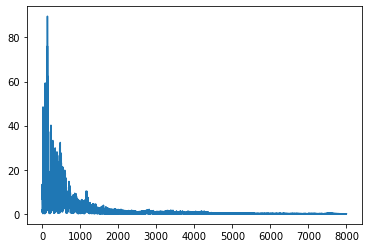

In [106]:
y = fft(data)
x = fftfreq(len(data),1/samplerate)[:(len(data)//2)]
x2 = fftfreq(400,1/samplerate)[:(len(data)//2)]
print(len(data),len(y),len(x))
print(x)
plt.plot(x,2/len(data) * np.abs(y[0:len(data)//2]))
# plt.xlim(1000,1010)
# plt.ylim(0,100)
plt.show()

# 建立聲音

48000


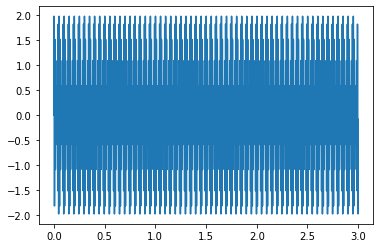

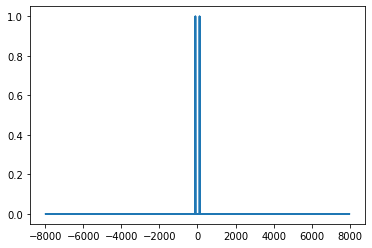

In [12]:
# 正弦波
sr = 16000
x = np.arange(0,3,1/sr)
y = 1 * np.sin(100*2*np.pi*x) + np.sin(120*2*np.pi*x) #+ np.sin(140*2*np.pi*x)

fx = fftfreq(len(x),1/sr)
fy = fft(y)
plt.figure()
plt.plot(x,y)

plt.figure()
# plt.plot(fx,2/len(x) * np.abs(fy))
plt.plot(fx,2/len(x) * np.abs(fy))
# plt.xlim(0,10)
print(len(x))

# 輸出 & 聽

In [2]:
import winsound
import wavio
#filename = "inputaudio.wav"
# winsound.PlaySound(filename, winsound.SND_FILENAME)
y = np.array(y* (2**14), np.int16)

wavio.write("mytune.wav",y,sr)

NameError: name 'np' is not defined

In [4]:
filename = "mytune.wav"
# winsound.PlaySound(filename, winsound.SND_FILENAME)

In [7]:
samplerate, data = wavfile.read(filename)
print(samplerate)

duration = len(data)/samplerate
# 利用資料的長度除以取樣率會是整個音訊的長度，單位 秒。
time = np.arange(0,duration,1/samplerate)
# 用 np 建立個 0 ~ duration 時間的資料，資料之間的間隔為 1/samplerate

16000


48000


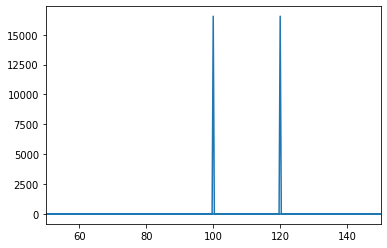

In [13]:
y = fft(data)
x = fftfreq(len(data),1/samplerate)
print(len(data))
plt.plot(x,2/len(data) * np.abs(y))
plt.xlim(50,150)
# plt.ylim(0,100)
plt.show()